In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import isclose

In [3]:
def stick_breaking(alpha, seed=0):
    np.random.seed(seed)
    v = []
    c = []
    while not isclose(sum(c), 1, rel_tol=1e-6):
        # v_k~beta(1,alpha)
        v.append(np.random.beta(1, alpha))
        # c_k=v_k*\prod_{j=1}^{k-1}(1-v_j)
        rest = (1-np.array(v[:-1])).prod()
        c.append(v[-1]*rest)
    return np.array(c)

In [4]:
c1 = stick_breaking(1, 1)
c2 = stick_breaking(1, 2)
c3 = stick_breaking(4, 1)
c4 = stick_breaking(4, 2)

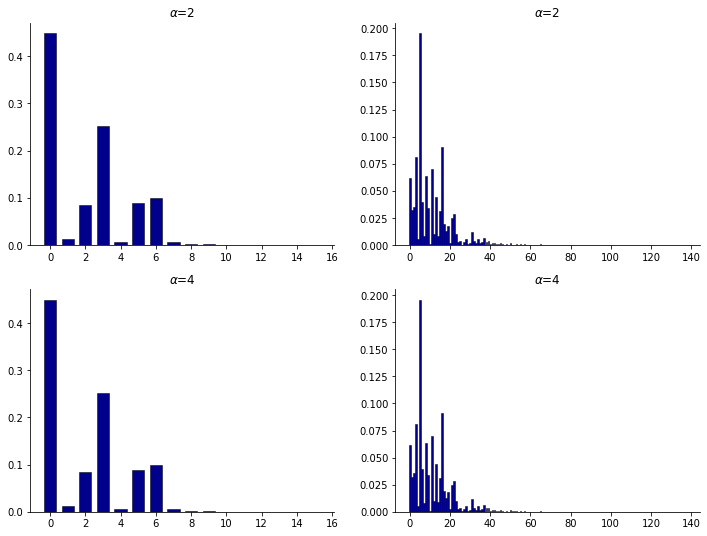

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12,9))

ax[0,0].bar(range(len(c1)), c1, linewidth=0.5, edgecolor="black", width=0.7, color="darkblue")
ax[0,0].set_title(r"$\alpha$=2")

ax[0,1].bar(range(len(c2)), c2, linewidth=0.5, edgecolor="black", width=0.7, color="darkblue")
ax[0,1].set_title(r"$\alpha$=2")

ax[1,0].bar(range(len(c3)), c3, linewidth=0.5, edgecolor="black", width=0.7, color="darkblue")
ax[1,0].set_title(r"$\alpha$=4")

ax[1,1].bar(range(len(c4)), c4, linewidth=0.5, edgecolor="black", width=0.7, color="darkblue")
ax[1,1].set_title(r"$\alpha$=4")

# margins
ax[0,0].spines['right'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)

ax[0,0].spines['top'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)
plt.show()

In [11]:
def dirichlet_process(alpha, mu=0, sigma=1, seed=0):
    # atoms sizes
    c = stick_breaking(alpha, seed=seed)
    # gaussian base measure
    np.random.seed(seed)
    phi = np.array([np.random.normal(mu,sigma) for c_k in c]) 
    return c, phi

In [12]:
c1, phi1 = dirichlet_process(1, mu=0, sigma=1, seed=0)
c2, phi2 = dirichlet_process(10, mu=0, sigma=1, seed=0)
c3, phi3 = dirichlet_process(1, mu=0, sigma=5, seed=0)
c4, phi4 = dirichlet_process(10, mu=0, sigma=5, seed=0)

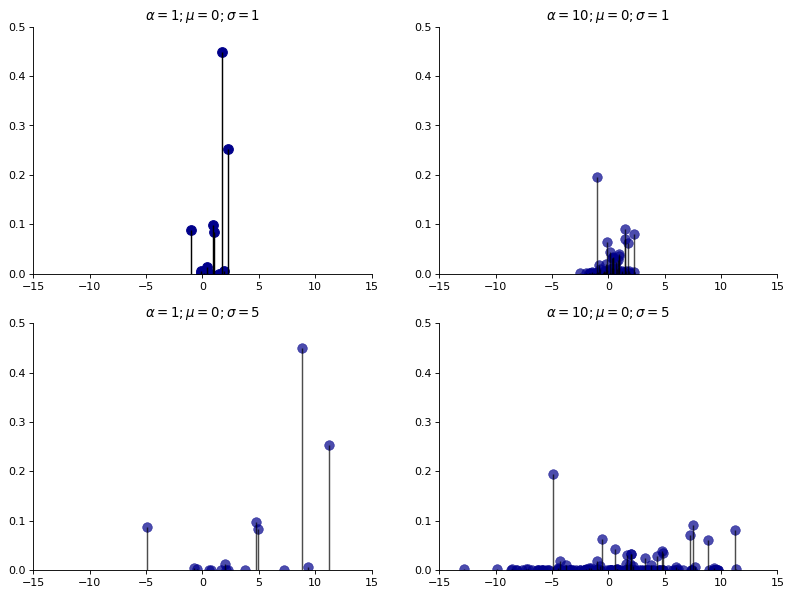

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,9), dpi= 80)

ax[0,0].vlines(x=phi1, ymin=0, ymax=c1, color='black', linewidth=1.3)
ax[0,0].scatter(x=phi1, y=c1, s=75, color='darkblue')
ax[0,0].set_title(r"$\alpha=1; \mu=0; \sigma=1$")

ax[0,1].vlines(x=phi2, ymin=0, ymax=c2, color='black', alpha=0.7, linewidth=1.3)
ax[0,1].scatter(x=phi2, y=c2, s=75, color='darkblue', alpha=0.7, linewidths=0.5)
ax[0,1].set_title(r"$\alpha=10; \mu=0; \sigma=1$")


ax[1,0].vlines(x=phi3, ymin=0, ymax=c3, color='black', alpha=0.7, linewidth=1.3)
ax[1,0].scatter(x=phi3, y=c3, s=75, color='darkblue', alpha=0.7, linewidths=0.5)
ax[1,0].set_title(r"$\alpha=1; \mu=0; \sigma=5$")

ax[1,1].vlines(x=phi4, ymin=0, ymax=c4, color='black', alpha=0.7, linewidth=1.3)
ax[1,1].scatter(x=phi4, y=c4, s=75, color='darkblue', alpha=0.7, linewidths=0.5)
ax[1,1].set_title(r"$\alpha=10; \mu=0; \sigma=5$")

# xlim
ax[0,0].set_xlim(-15, 15)
ax[0,1].set_xlim(-15, 15)
ax[1,0].set_xlim(-15, 15)
ax[1,1].set_xlim(-15, 15)

# ylim
ax[0,0].set_ylim(0, 0.5)
ax[0,1].set_ylim(0, 0.5)
ax[1,0].set_ylim(0, 0.5)
ax[1,1].set_ylim(0, 0.5)

# margins
ax[0,0].spines['right'].set_visible(False)
ax[0,1].spines['right'].set_visible(False)
ax[1,0].spines['right'].set_visible(False)
ax[1,1].spines['right'].set_visible(False)

ax[0,0].spines['top'].set_visible(False)
ax[0,1].spines['top'].set_visible(False)
ax[1,0].spines['top'].set_visible(False)
ax[1,1].spines['top'].set_visible(False)

plt.show()